In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sklearn
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Read data
df = pd.read_csv('Data for python.csv', sep=';', header=1, index_col=0, decimal=',')

# Remove unnecessary columns
df = df.drop(['Kassenr', 'ScandcleftID', 'Id', 'Født', 'Materialedato A',
       'Total Row Score A', 'Goslon Score A', 'Materialedato B',
       'Total Row Score B','Goslon Score B', 'Materialedato C',
       'Anteroposterior 1.2', 'Anteroposterior 2.1', 'Vertical 1.2', 
       'Vertical 2.2', 'Transverse.2','Crowding .2', 'Spacing.2', 
       'Tooth shape/size\r\n.2', 'Pan 1.2','Pan 2\r\n.2', 
       'Goslon Score C', 'Pan 1', 'Pan 1.1'], axis=1)

# Remove rows with missing values
df = df.dropna()

# Save
df.to_csv('Data for python_cleaned.csv', sep=';', decimal=',')

def pin_update(row):
    if row["Total Row Score C"] <= 5:
        return 0
    else:
        return 1


FileNotFoundError: [Errno 2] No such file or directory: 'Data for python.csv'

Principal Components Analysis

In [ ]:
X = df.drop(columns=["Total Row Score C"])
y = df.apply(pin_update, axis=1)
y = y.values

In [ ]:
# Normalizing the data
scaler = MinMaxScaler()
Xtilde = scaler.fit_transform(X)
Xtilde.shape

(117, 18)

In [ ]:
# Covariance matrix
cov_matrix = np.cov(Xtilde.T)

In [ ]:
# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues = sorted(eigenvalues, reverse=True)
eigenvectors = eigenvectors[:, np.argsort(eigenvalues)[::-1]]
Lambda = eigenvalues/sum(eigenvalues)

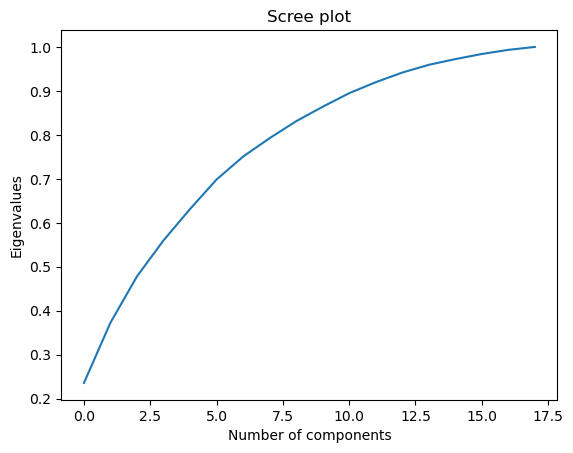

In [ ]:
# scree plot
plt.plot(np.cumsum(Lambda))
plt.title("Scree plot")
plt.xlabel("Number of components")
plt.ylabel("Eigenvalues")
plt.show()


In [ ]:
# remove components until 95% of variance is explained
cumsum = np.cumsum(Lambda)
n_components = np.argmax(cumsum >= 0.95) + 1
n_components

14

In [ ]:
# Reduce the dimensionality of the dataset
eigenvalues = eigenvalues[:n_components]
eigenvectors = eigenvectors[:, :n_components]
eigenvectors.shape

(18, 14)

In [ ]:
X_pca = Xtilde.dot(eigenvectors)

# Things we need to save
saved_columns = df.columns[np.argsort(np.abs(eigenvectors).sum(axis=1))[(df.shape[1]-n_components):]]
removed_columns = df.columns[np.argsort(np.abs(eigenvectors).sum(axis=1))[:(df.shape[1]-n_components)]]
eigenvectors = eigenvectors[n_components:]
X_pca.shape

(117, 14)

In [ ]:
# Saving the X_pca to a csv file
df_pca = pd.DataFrame(X_pca)
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.007098,-0.801823,0.127808,-1.127364,-1.030661,0.077552,-0.414645,-0.369436,-0.692367,0.817095,0.336992,-0.694651,0.129115,0.020823
1,1.303318,-0.832153,-0.521428,-0.006780,-1.259923,0.475414,-0.413402,-0.086802,-0.353772,0.605755,0.162970,-0.443105,0.026613,-0.161888
2,0.261002,-0.124618,0.269169,-0.344671,-0.289276,-0.260738,-0.103478,-0.211757,-1.116701,0.784866,0.058711,-0.566724,-0.180816,-0.172504
3,1.898968,0.253859,-0.236113,-0.598031,-1.193946,0.140322,0.124547,-0.278571,-0.694407,0.757444,0.227733,-0.562278,-0.056644,-0.298553
4,-0.098823,-0.332190,0.132189,-0.751196,-0.659402,0.228348,-0.215355,-0.175391,-0.606188,0.794603,0.021530,-0.413204,-0.298241,-0.704773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,1.670088,0.017853,-0.145029,-0.296132,-0.801015,-0.917997,-0.017478,-0.575370,-0.402043,0.721899,0.193695,-0.813485,-0.003381,-0.347906
113,0.578152,-0.902900,-0.153732,-1.273548,-0.803834,-0.045482,-0.337356,-0.222008,-0.428020,0.770869,0.279891,-0.698769,0.046434,-0.158327
114,2.179134,-0.708621,-0.095180,-0.161491,-0.626417,0.422871,0.874479,-0.752629,-0.599193,0.820893,0.053382,-0.391393,-0.220597,-0.144265
115,1.721328,-0.000847,0.506563,-0.981486,-0.960353,0.033156,-0.128083,-0.129389,-0.317074,0.744847,0.176189,-0.494471,-0.128560,-0.228553


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size=0.25, shuffle=True)

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr = logisticRegr.fit(X_train, Y_train)

In [ ]:
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, Y_test)
print(score)

0.7333333333333333


In [ ]:
#mean accuracy
score = 0
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size=0.25, shuffle=True)
    logisticRegr = LogisticRegression()
    logisticRegr = logisticRegr.fit(X_train, Y_train)
    predictions = logisticRegr.predict(X_test)
    score += logisticRegr.score(X_test, Y_test)
    
print(score/100)

0.6600000000000003
